In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler

%matplotlib inline
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
# load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
# normalize data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [84]:
# Callback for stop training after threshold accuracy
ACCURACY_THRESHOLD = 0.996
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > ACCURACY_THRESHOLD and logs.get('loss') < 0.003):
            print("\nReached %2.2f%% accuracy, stopping training!"%(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True
            
callbacks = CustomCallback()

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=10, verbose=1, restore_best_weights=True)

# Set a learning rate annealer
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [90]:
# model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, validation_data=(x_test, y_test))

Epoch 1/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2079 - accuracy: 0.9360 - val_loss: 0.1044 - val_accuracy: 0.9672
Epoch 2/6
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0881 - accuracy: 0.9718 - val_loss: 0.0845 - val_accuracy: 0.9755
Epoch 3/6
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0599 - accuracy: 0.9815 - val_loss: 0.0852 - val_accuracy: 0.9751
Epoch 4/6
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 0.0945 - val_accuracy: 0.9750
Epoch 5/6
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0776 - val_accuracy: 0.9798
Epoch 6/6
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0288 - accuracy: 0.9907 - val_loss: 0.0864 - val_accuracy: 0.9780


In [91]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0864 - accuracy: 0.9780
0.08640706539154053
0.9779999852180481


In [92]:
# Save the model
model.save('models/digit_classifier.model')

INFO:tensorflow:Assets written to: models/digit_classifier.model/assets


In [88]:
new_model = tf.keras.models.load_model('models/digit_classifier.model')

3


<function matplotlib.pyplot.show(*args, **kw)>

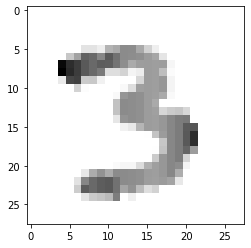

In [89]:
# Make predictions
predictions = new_model.predict(x_test)

test_example = 500
print(np.argmax(predictions[test_example]))
plt.imshow(x_test[test_example], cmap=plt.cm.binary)
plt.show